Perform the following operations using R/Python on the data sets:
a) Compute and display summary statistics for each feature available in the dataset. (e.g.
minimum value, maximum value, mean, range, standard deviation, variance and
percentiles
b) Illustrate the feature distributions using histogram.
c) Data cleaning, Data integration, Data transformation, Data model building (e.g.
Classification)

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\MANSI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
data = pd.read_csv('screen_time.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          198 non-null    int64  
 1   Gender                       198 non-null    object 
 2   Screen Time Type             198 non-null    object 
 3   Day Type                     198 non-null    object 
 4   Average Screen Time (hours)  198 non-null    float64
 5   Sample Size                  198 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.4+ KB


In [6]:

data.describe()

,Age,Average Screen Time (hours),Sample Size
count,198.000000,198.000000,198.000000
mean,10.000000,2.993030,400.000000
std,3.170294,1.922822,63.405872
min,5.000000,0.440000,300.000000
25%,7.000000,1.402500,340.000000
50%,10.000000,2.490000,400.000000
75%,13.000000,4.397500,460.000000
max,15.000000,8.190000,500.000000


In [7]:
data.shape

(198, 6)

In [16]:
print(data.columns)

Index(['Age', 'Gender', 'Screen Time Type', 'Day Type',
       'Average Screen Time (hours)', 'Sample Size'],
      dtype='object')


In [8]:
#step 1 handling missing values
print("Missing values before cleaning:")
data.isnull().sum()

Missing values before cleaning:


Age                            0
Gender                         0
Screen Time Type               0
Day Type                       0
Average Screen Time (hours)    0
Sample Size                    0
dtype: int64

In [9]:
#step 2 : handling duplicates
print(f"Number of duplicates before cleaning: {data.duplicated().sum()}")

Number of duplicates before cleaning: 0


In [10]:
#step 3 : handling outliers

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [11]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['Age', 'Average Screen Time (hours)', 'Sample Size'], dtype='object')


In [12]:
#the number of outliers present in each numerical value
import numpy as np

# Function to detect outliers in multiple columns
def detect_outliers(df, columns):
    outlier_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_dict[col] = len(outliers)

    return outlier_dict

# Detect outliers for numerical columns
outliers_detected = detect_outliers(data, numerical_cols)
print(outliers_detected)


{'Age': 0, 'Average Screen Time (hours)': 0, 'Sample Size': 0}


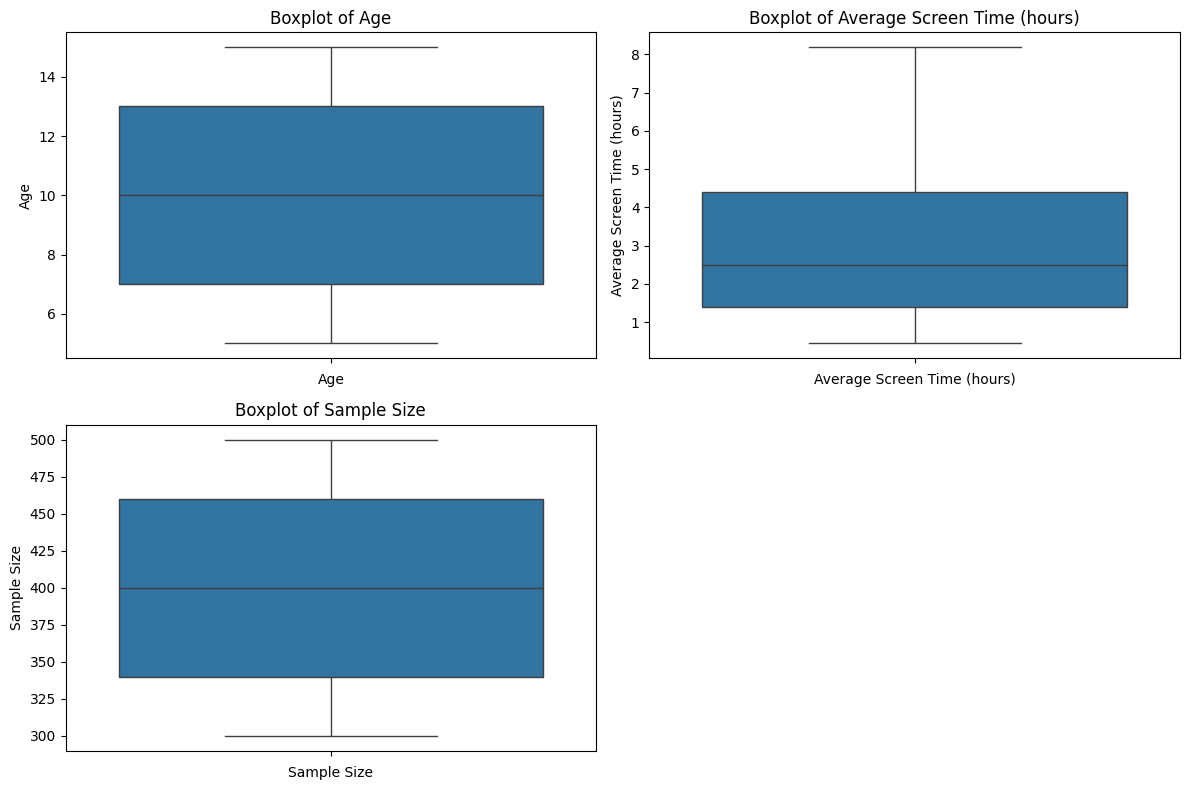

In [17]:
plt.figure(figsize=(12, 8))

columns_to_check = ['Age', 'Average Screen Time (hours)', 'Sample Size']
for i, col in enumerate(columns_to_check):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

as there are no outliers we can skip this step

data preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [20]:
#step 1 : seperate the features and target variable
X = data.drop(columns=['Screen Time Type'])
y = data['Screen Time Type']


In [21]:
categorical_cols = ['Gender', 'Screen Time Type', 'Day Type']
numerical_cols = ['Age', 'Average Screen Time (hours)', 'Sample Size']

In [22]:
# Step 3: Define preprocessing for numerical and categorical features
# Numerical features: Standard scaling
numerical_transformer = StandardScaler()

# Categorical features: One-hot encoding
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

In [23]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [27]:
# Ensure numerical_cols and categorical_cols only contain columns present in X
numerical_cols = [col for col in numerical_cols if col in X.columns]
categorical_cols = [col for col in categorical_cols if col in X.columns]

# Update the preprocessor with the filtered columns
preprocessor = ColumnTransformer(
	transformers=[
		('num', numerical_transformer, numerical_cols),
		('cat', categorical_transformer, categorical_cols)
	]
)

# Update the pipeline with the new preprocessor
pipeline = Pipeline(steps=[
	('preprocessor', preprocessor)
])

# Applying the pipeline to the dataset
X_processed = pipeline.fit_transform(X)
print("Data preprocessing completed.")

Data preprocessing completed.


In [28]:
print(data.columns)

Index(['Age', 'Gender', 'Screen Time Type', 'Day Type',
       'Average Screen Time (hours)', 'Sample Size'],
      dtype='object')


In [29]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [30]:
#Summary
print("Preprocessing completed. Data is ready for modeling.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Preprocessing completed. Data is ready for modeling.
Training set shape: (158, 6)
Testing set shape: (40, 6)


In [38]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, classification_report, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


In [61]:
y_pred = model.predict(X_test)
print("Model prediction completed.")
y_prob = model.predict_proba(X_test)[:, 1]


Model prediction completed.


In [41]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

 Educational       1.00      1.00      1.00        17
Recreational       0.82      0.75      0.78        12
       Total       0.75      0.82      0.78        11

    accuracy                           0.88        40
   macro avg       0.86      0.86      0.86        40
weighted avg       0.88      0.88      0.88        40



In [42]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.88


In [45]:
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")

Precision: 0.86


In [47]:
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")

Recall: 0.86


In [48]:
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.2f}")

F1 Score: 0.86


In [55]:
std_dev = np.std(y_pred_encoded)
print(f"Standard Deviation of Predictions: {std_dev:.2f}")

Standard Deviation of Predictions: 0.84


In [56]:
variance = np.var(y_pred_encoded)
print(f"Variance of Predictions: {variance:.2f}")

Variance of Predictions: 0.71


In [49]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[17  0  0]
 [ 0  9  3]
 [ 0  2  9]]


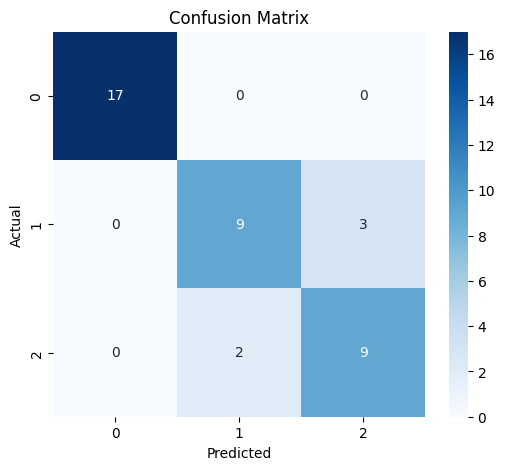

In [50]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

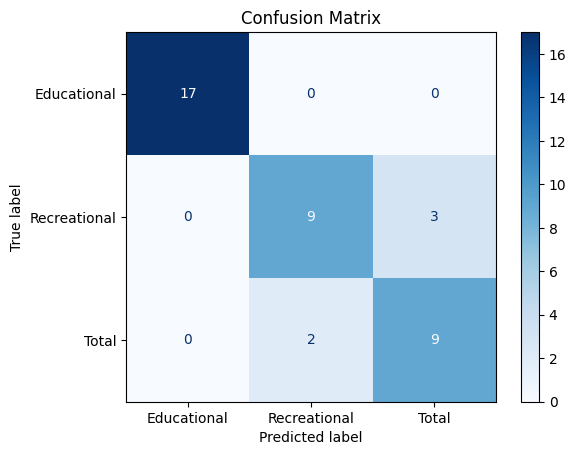

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix")
plt.show()

In [64]:
# Ensure y_test is encoded
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# ROC Curve and AUC
roc_auc = roc_auc_score(y_test_encoded, model.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.96


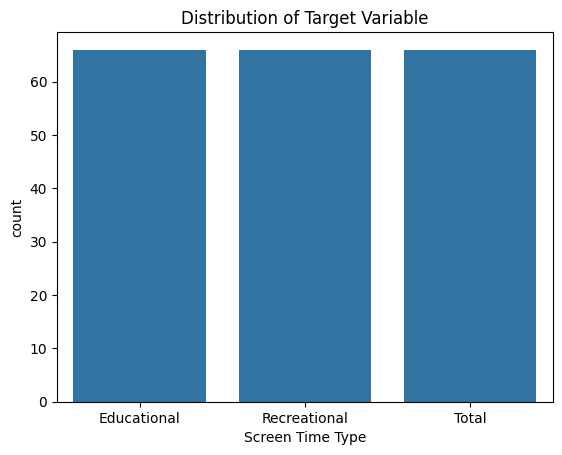

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Screen Time Type', data=data)
plt.title('Distribution of Target Variable')
plt.show()

In [71]:
# Feature Importance
importances = model.feature_importances_
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()


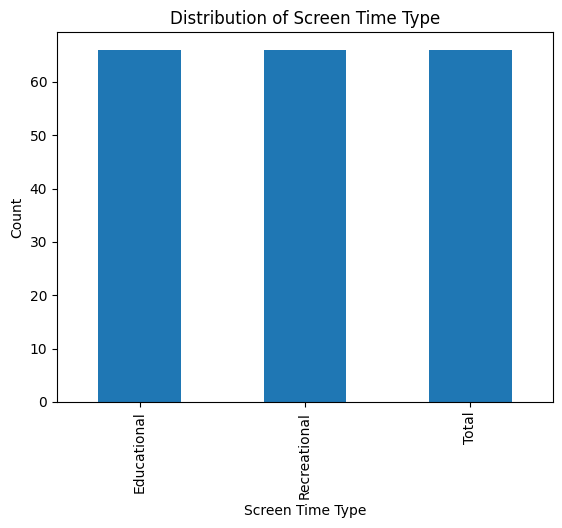

In [72]:
data['Screen Time Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Screen Time Type')
plt.xlabel('Screen Time Type')
plt.ylabel('Count')
plt.show()

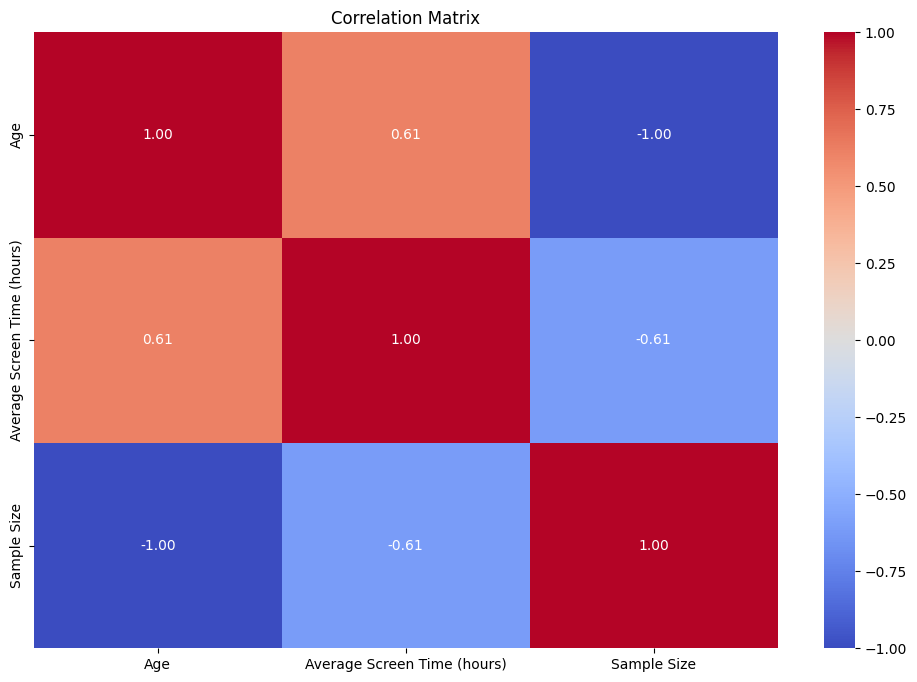

In [76]:
# Find the correlation between our independent variables
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
corr_matrix = numeric_data.corr()  # Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

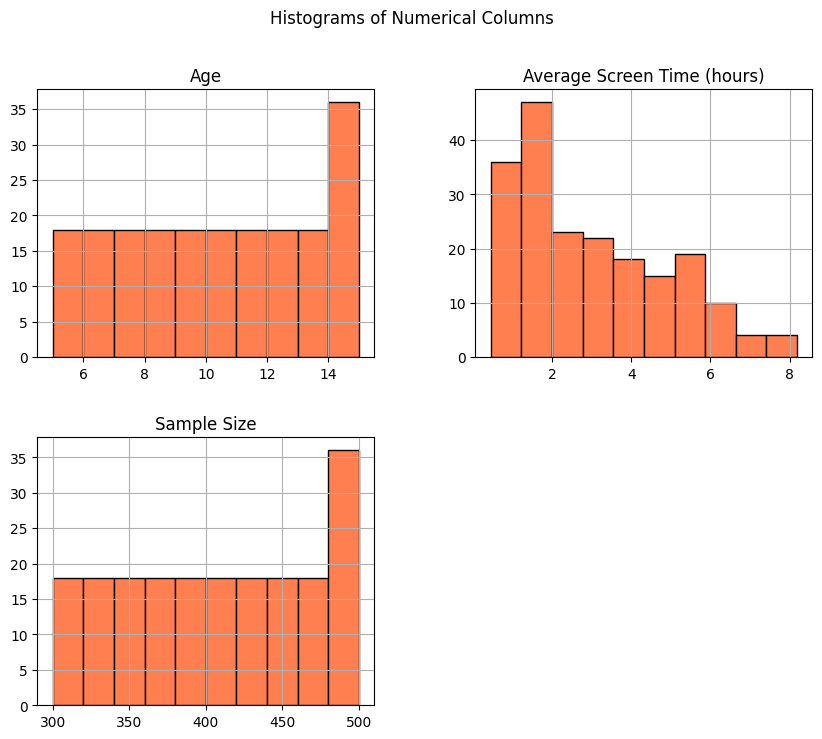

In [82]:
data[numerical_cols].hist(bins=10, figsize=(10, 8), color='coral', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

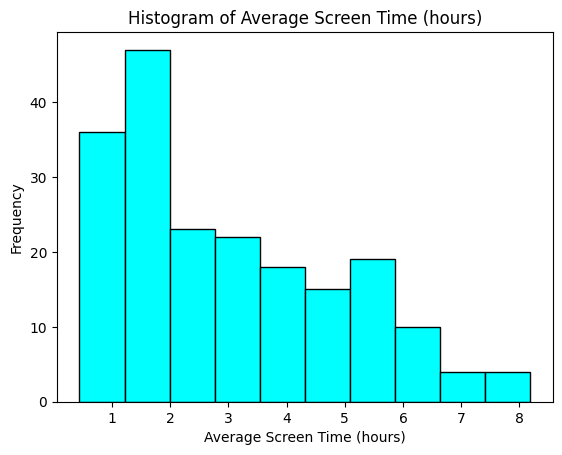

In [83]:
plt.hist(data['Average Screen Time (hours)'], bins=10, color='cyan', edgecolor='black')
plt.title('Histogram of Average Screen Time (hours)')
plt.xlabel('Average Screen Time (hours)')
plt.ylabel('Frequency')
plt.show()